### Práctica 1 - Librerías Python

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dataset = load_breast_cancer()
df = pd.DataFrame(data = dataset.data,columns=dataset.feature_names)
df['target'] = dataset.target


In [2]:
areas = np.array(df['mean compactness'])


print("Media de areas:", np.mean(areas))
print("Desviación típica:", np.std(areas))
print("Mediana:", np.median(areas))


Media de areas: 0.10434098418277679
Desviación típica: 0.05276632912535515
Mediana: 0.09263


In [3]:

print(df.head())
print(df.describe())
print("\nFiltrado por clase:")
print(df[df["target"] == 0])
print("\nMedia por clase:")
print(df.groupby("target").mean())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

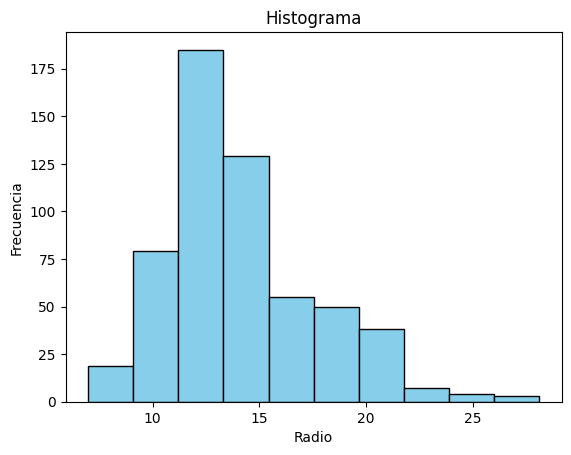

In [4]:
plt.hist(df['mean radius'], bins=10, color='skyblue',edgecolor = 'black')
plt.title('Histograma')
plt.xlabel('Radio')
plt.ylabel('Frecuencia')
plt.show()


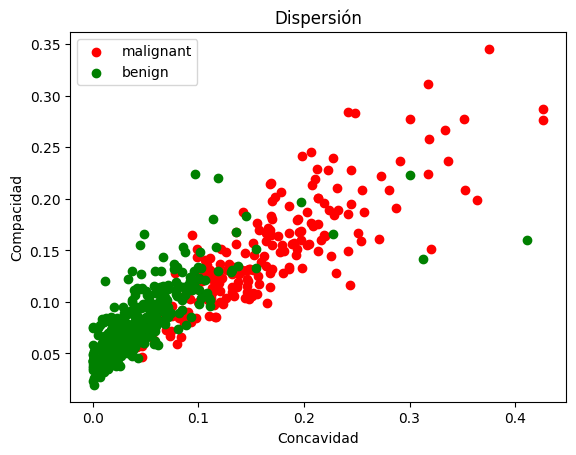

In [5]:
colors = ['red', 'green']
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean concavity'],
                df[df['target'] == i]['mean compactness'],
                label=dataset.target_names[i], color=colors[i])
plt.xlabel('Concavidad')
plt.ylabel('Compacidad')
plt.title('Dispersión')
plt.legend()
plt.show()

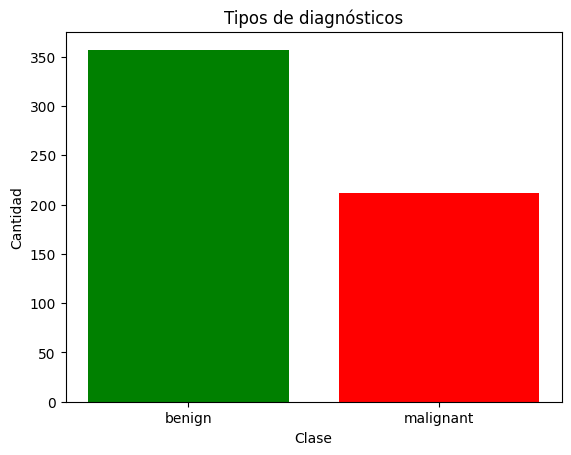

In [6]:
counts = df['target'].value_counts()
labels = [dataset.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['green','red'])
plt.title('Tipos de diagnósticos')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()


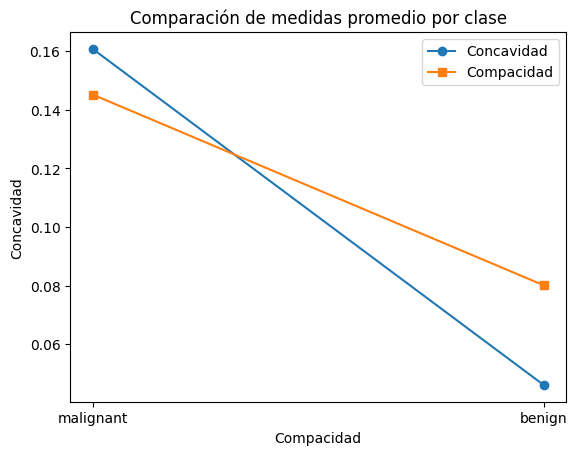

In [7]:
grouped_means = df.groupby('target')[['mean compactness','mean concavity']].mean()
labels = [dataset.target_names[i] for i in grouped_means.index]

plt.plot(labels, grouped_means['mean concavity'], label='Concavidad', marker='o')
plt.plot(labels, grouped_means['mean compactness'], label='Compacidad', marker='s')
plt.title('Comparación de medidas promedio por clase')
plt.ylabel('Concavidad')
plt.xlabel('Compacidad')
plt.legend()
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_64124\1005220890.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=dataset.target_names)


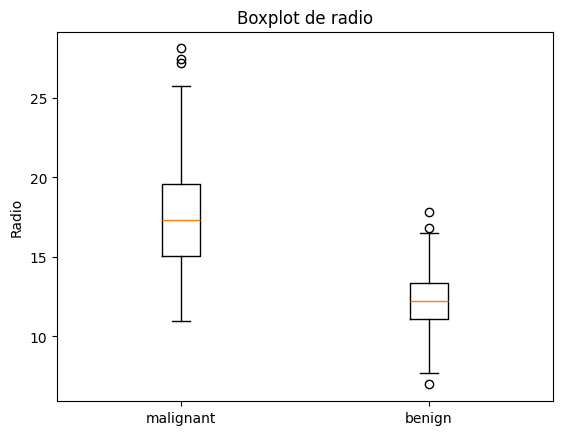

In [8]:
data = [df[df['target'] == i]['mean radius'] for i in range(2)]
plt.boxplot(data, labels=dataset.target_names)
plt.title('Boxplot de radio')
plt.ylabel('Radio')
plt.show()

In [9]:

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.9473684210526315

Matriz de confusión:
[[40  3]
 [ 3 68]]
